# Simple MNIST CNN Model

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
K.set_image_dim_ordering('th')

## Hyperparameter

In [3]:
BATCH_SIZE = 64
EPOCHS = 10

## Set fix seed

In [4]:
np.random.seed(100)

## Load MNIST dataset from keras

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## 1) Data Preprocessing

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2]).astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

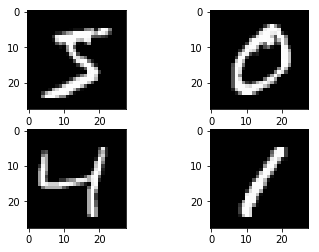

In [8]:
# visualize data
plt.subplot(221)
plt.imshow(X_train[0][:][:][0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1][0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2][0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3][0], cmap=plt.get_cmap('gray'))
plt.show()

## 2) Define Model

In [9]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['MAE'])

## 3) Train and Evaluate Model

In [12]:
#model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

In [16]:
#score = model.evaluate(X_test, y_test, verbose=0)

## 4) Visulize model

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.